# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**.

<img src=https://i.imgur.com/kq7hrEh.png>


# Import Statements


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sea
from sklearn.linear_model import LinearRegression


# Notebook Presentation


In [45]:
pd.options.display.float_format = "{:,.2f}".format

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Read the Data


In [46]:
data = pd.read_csv("cost_revenue_dirty.csv")


# Explore and Clean the Data


**Challenge**: Answer these questions about the dataset:

1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?


In [47]:
data = data.fillna(0)
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


### Data Type Conversions


**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>
Note that _domestic_ in this context refers to the United States.


In [48]:
char_to_remove = ["$", ","]
for i in ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]:
    for j in char_to_remove:
        data[i] = data[i].astype("str").str.replace(j, "")
    data[i] = pd.to_numeric(data[i])


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type.


In [49]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0


### Descriptive Statistics


**Challenge**:

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?


In [50]:
print(f"The Average Data.USD_Production_Budget:- {data.USD_Production_Budget.mean()} .")
print(f"The Average Data.USD_Worldwide_Gross:- {data.USD_Worldwide_Gross.mean()} .")

print(
    f"The minimum for USD_Worldwide_Gross is {data.USD_Worldwide_Gross.min()} and for USD_Domestic_Gross {data.USD_Domestic_Gross.min()} ."
)

data.tail(round((len(data) / 100) * 25)).USD_Worldwide_Gross.mean()
print(
    f"The Highest USD_Production_Budget is {data.USD_Production_Budget.max()} and USD_Worldwide_Gross is {data.USD_Worldwide_Gross.max()} ."
)
highest_revenue_movie = int(
    data[
        data.USD_Production_Budget == data.USD_Production_Budget.max()
    ].USD_Worldwide_Gross
)
lowest_revenue_movie = int(
    data[
        data.USD_Production_Budget == data.USD_Production_Budget.min()
    ].USD_Worldwide_Gross
)
print(
    f"The revenue for lowest USD_Production_Budget is {lowest_revenue_movie}and the highest is {highest_revenue_movie} ."
)
data.describe()

The Average Data.USD_Production_Budget:- 31113737.57837136 .
The Average Data.USD_Worldwide_Gross:- 88855421.96271564 .
The minimum for USD_Worldwide_Gross is 0 and for USD_Domestic_Gross 0 .
The Highest USD_Production_Budget is 425000000 and USD_Worldwide_Gross is 2783918982 .
The revenue for lowest USD_Production_Budget is 181041and the highest is 2783918982 .


C:\Users\nicoz\AppData\Local\Temp\ipykernel_16416\2648952959.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  highest_revenue_movie = int(
C:\Users\nicoz\AppData\Local\Temp\ipykernel_16416\2648952959.py:17: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  lowest_revenue_movie = int(


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films


**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?


In [51]:
# f"{1920*1080*3*60:,}"
data[data.USD_Domestic_Gross == 0].sort_values(
    "USD_Production_Budget", ascending=False
).head(1)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?


In [52]:
data[data.USD_Worldwide_Gross == 0].sort_values(
    "USD_Production_Budget", ascending=False
).head(1)


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


### Filtering on Multiple Conditions


In [53]:
data[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]
data.loc[(data.USD_Worldwide_Gross != 0) & (data.USD_Domestic_Gross == 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States.

Hint: This time you'll have to use the `and` keyword.


In [54]:
data.query("not USD_Worldwide_Gross == 0 and USD_Domestic_Gross == 0")

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


### Unreleased Films

**Challenge**:

-   Identify which films were not released yet as of the time of data collection (May 1st, 2018).
-   How many films are included in the dataset that have not yet had a chance to be screened in the box office?
-   Create another DataFrame called data_clean that does not include these films.


In [55]:
# Date of Data Collection
scrape_date = pd.Timestamp("2018-5-1")


In [56]:
not_release_movies = data.query("`Release_Date` > @scrape_date")
print(f"The Total Number of not released movies:- {len(not_release_movies)}")
data_clean = data.drop(not_release_movies.index)
data_clean

The Total Number of not released movies:- 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


### Films that Lost Money

**Challenge**:
What is the percentage of films where the production costs exceeded the worldwide gross revenue?


In [57]:
float(
    f"{(len(data_clean.query('USD_Production_Budget > USD_Worldwide_Gross'))/len(data_clean))*100:.2f}"
)
data_clean


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


# Seaborn for Data Viz: Bubble Charts


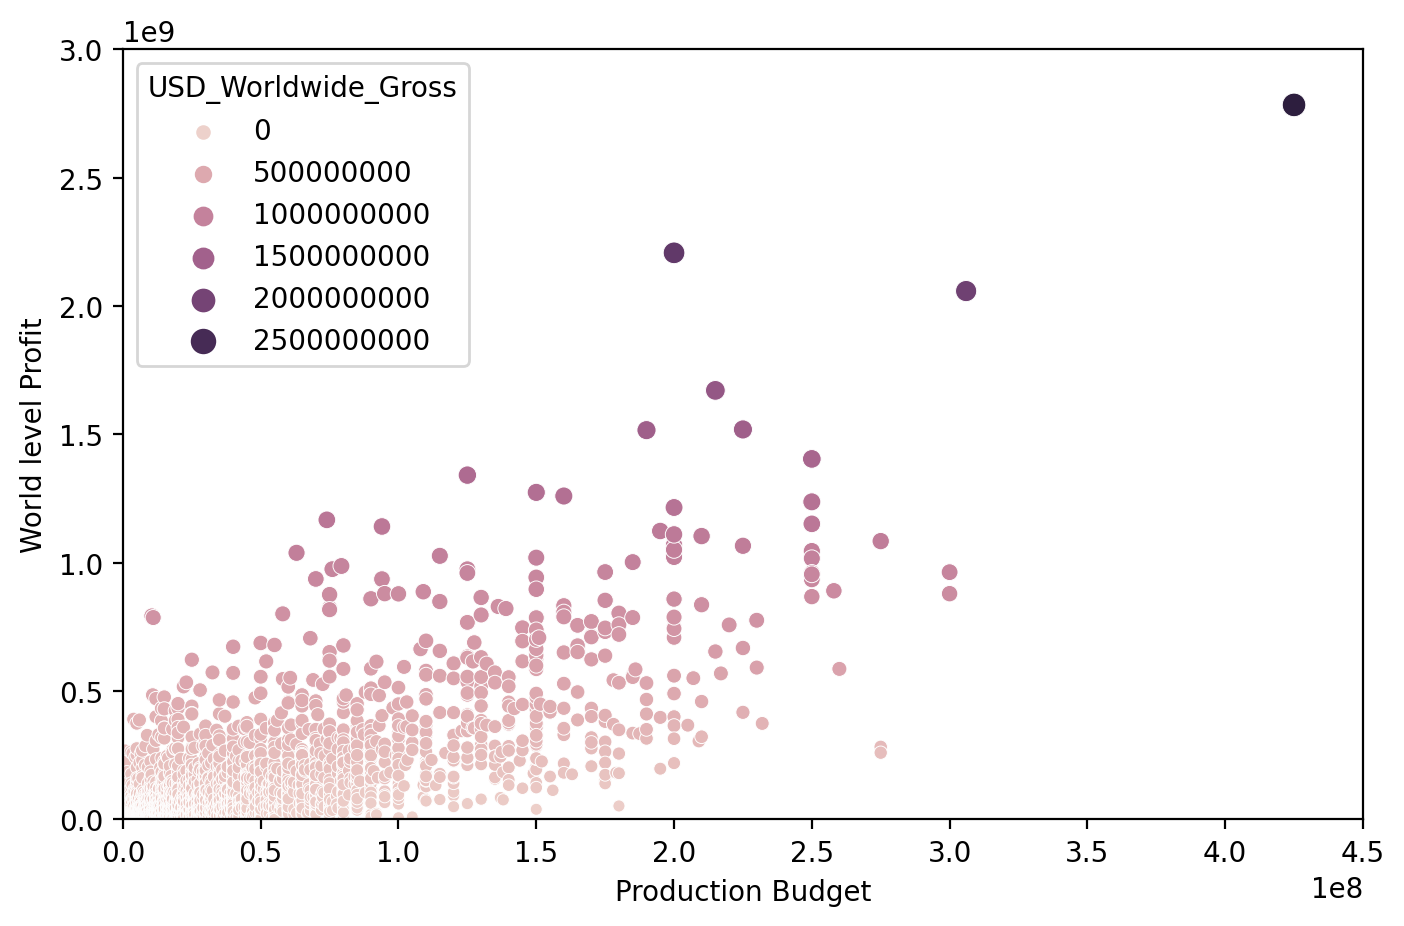

In [58]:
plt.figure(figsize=(8, 5), dpi=200)
ax = sea.scatterplot(
    data=data_clean.sort_values("USD_Production_Budget"),
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross",
    size="USD_Worldwide_Gross",
    hue="USD_Worldwide_Gross",
)
ax.set(
    xlim=(0, 450000000),
    ylim=(0, 3000000000),
    ylabel="World level Profit",
    xlabel="Production Budget",
)
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>


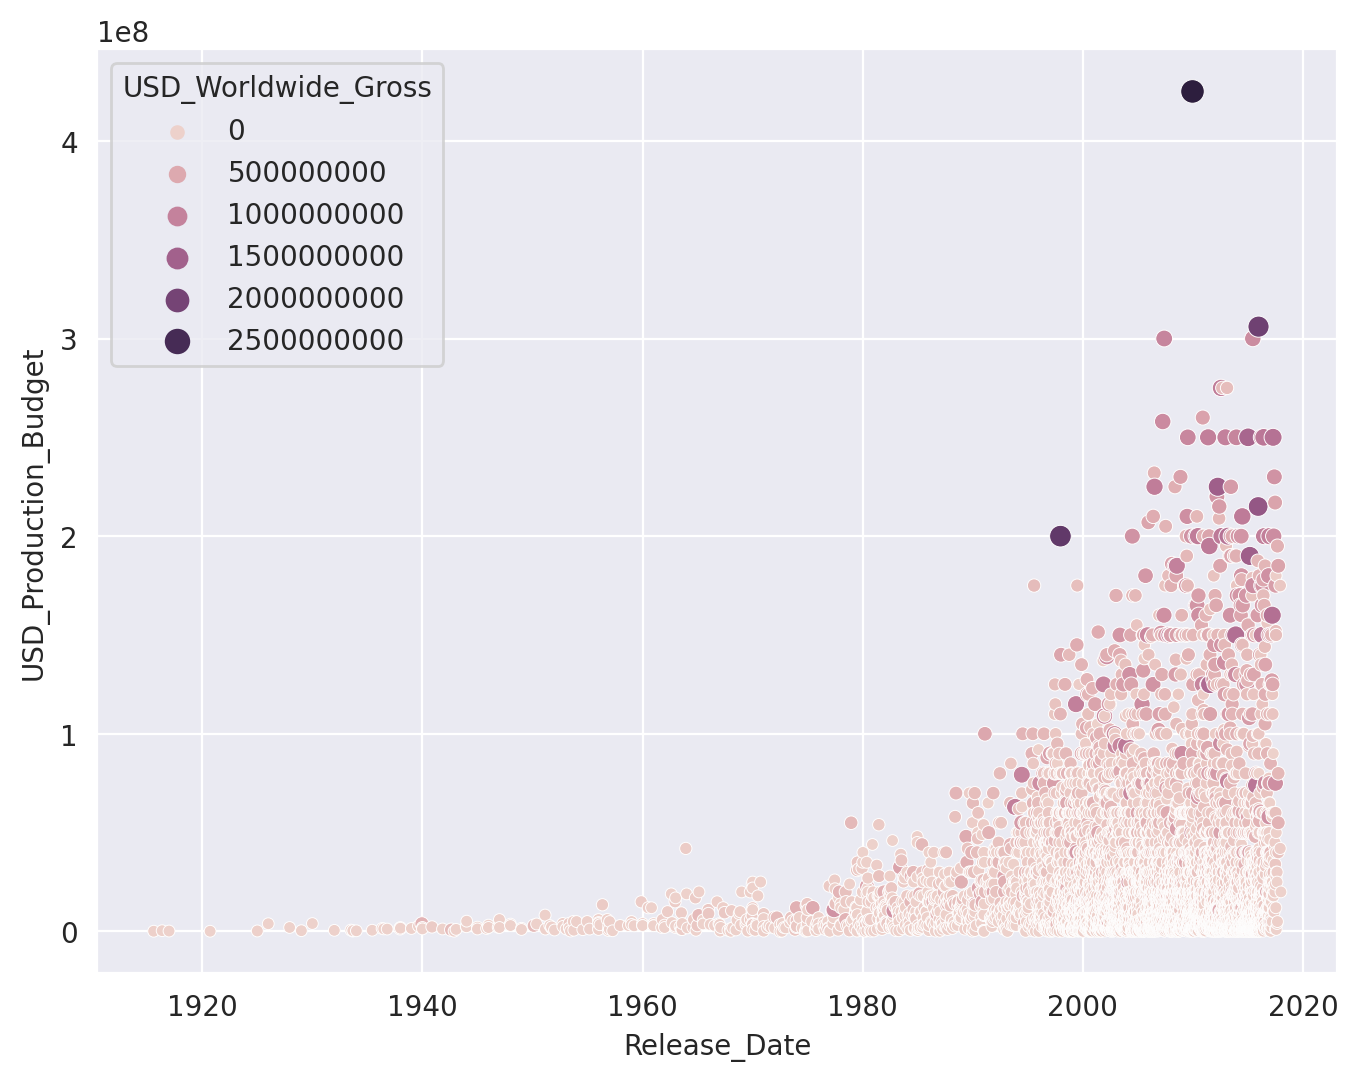

In [59]:
plt.figure(figsize=(8, 6), dpi=200)
with sea.axes_style("darkgrid"):
    ax = sea.scatterplot(
        data=data_clean,
        x="Release_Date",
        y="USD_Production_Budget",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross",
    )

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release.

<img src=https://i.imgur.com/0VEfagw.png width=650>

Here's how:

1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column.
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
   <img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.


In [60]:
dates = data_clean.Release_Date.values
decade_dataframe = pd.DatetimeIndex(data=dates).year // 10 * 10

data_clean.insert(loc=6, column="Decade", value=decade_dataframe)

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`

-   `old_films` should include all the films before 1969 (up to and including 1969)
-   `new_films` should include all the films from 1970 onwards
-   How many films were released prior to 1970?
-   What was the most expensive film made prior to 1970?


In [61]:
old_films = pd.DataFrame(data_clean[data_clean.Decade < 1970])
new_films = pd.DataFrame(data_clean[data_clean.Decade >= 1970])
most_expensive_films = old_films[
    old_films.USD_Production_Budget == old_films.USD_Production_Budget.max()
].Movie_Title.values[0]
print(f"There are {len(old_films)} films released before 1970.")
print(f"There are {len(data_clean[data_clean.Decade == 1970])} films released in 1970.")
print(f"There are {len(new_films)} films released after 1970.")
print(f"The Most expensive films before 1970 is {most_expensive_films}.")

There are 153 films released before 1970.
There are 109 films released in 1970.
There are 5231 films released after 1970.
The Most expensive films before 1970 is Cleopatra.


# Seaborn Regression Plots


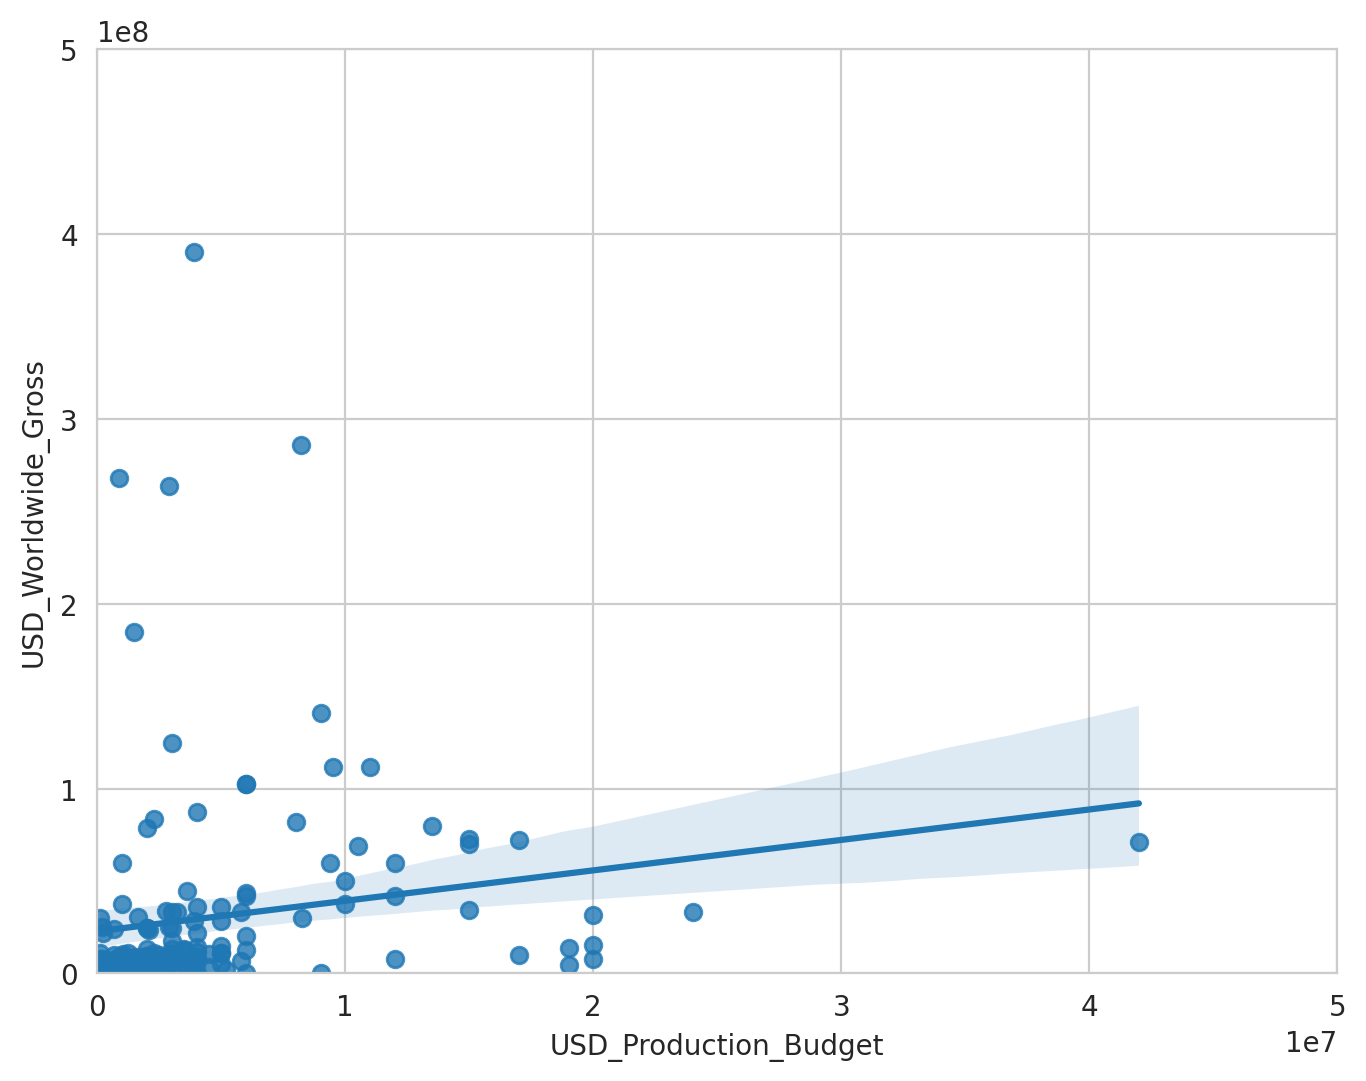

In [62]:
plt.figure(figsize=(8, 6), dpi=200)
with sea.axes_style("whitegrid"):
    ax = sea.regplot(data=old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross")
    ax.set(xlim=(0, 50000000), ylim=(0, 500000000))


**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`.
<br>
<br>
Style the chart

-   Put the chart on a `'darkgrid'`.
-   Set limits on the axes so that they don't show negative values.
-   Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
-   Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

-   Do our data points for the new films align better or worse with the linear regression than for our older films?
-   Roughly how much would a film with a budget of $150 million make according to the regression line?


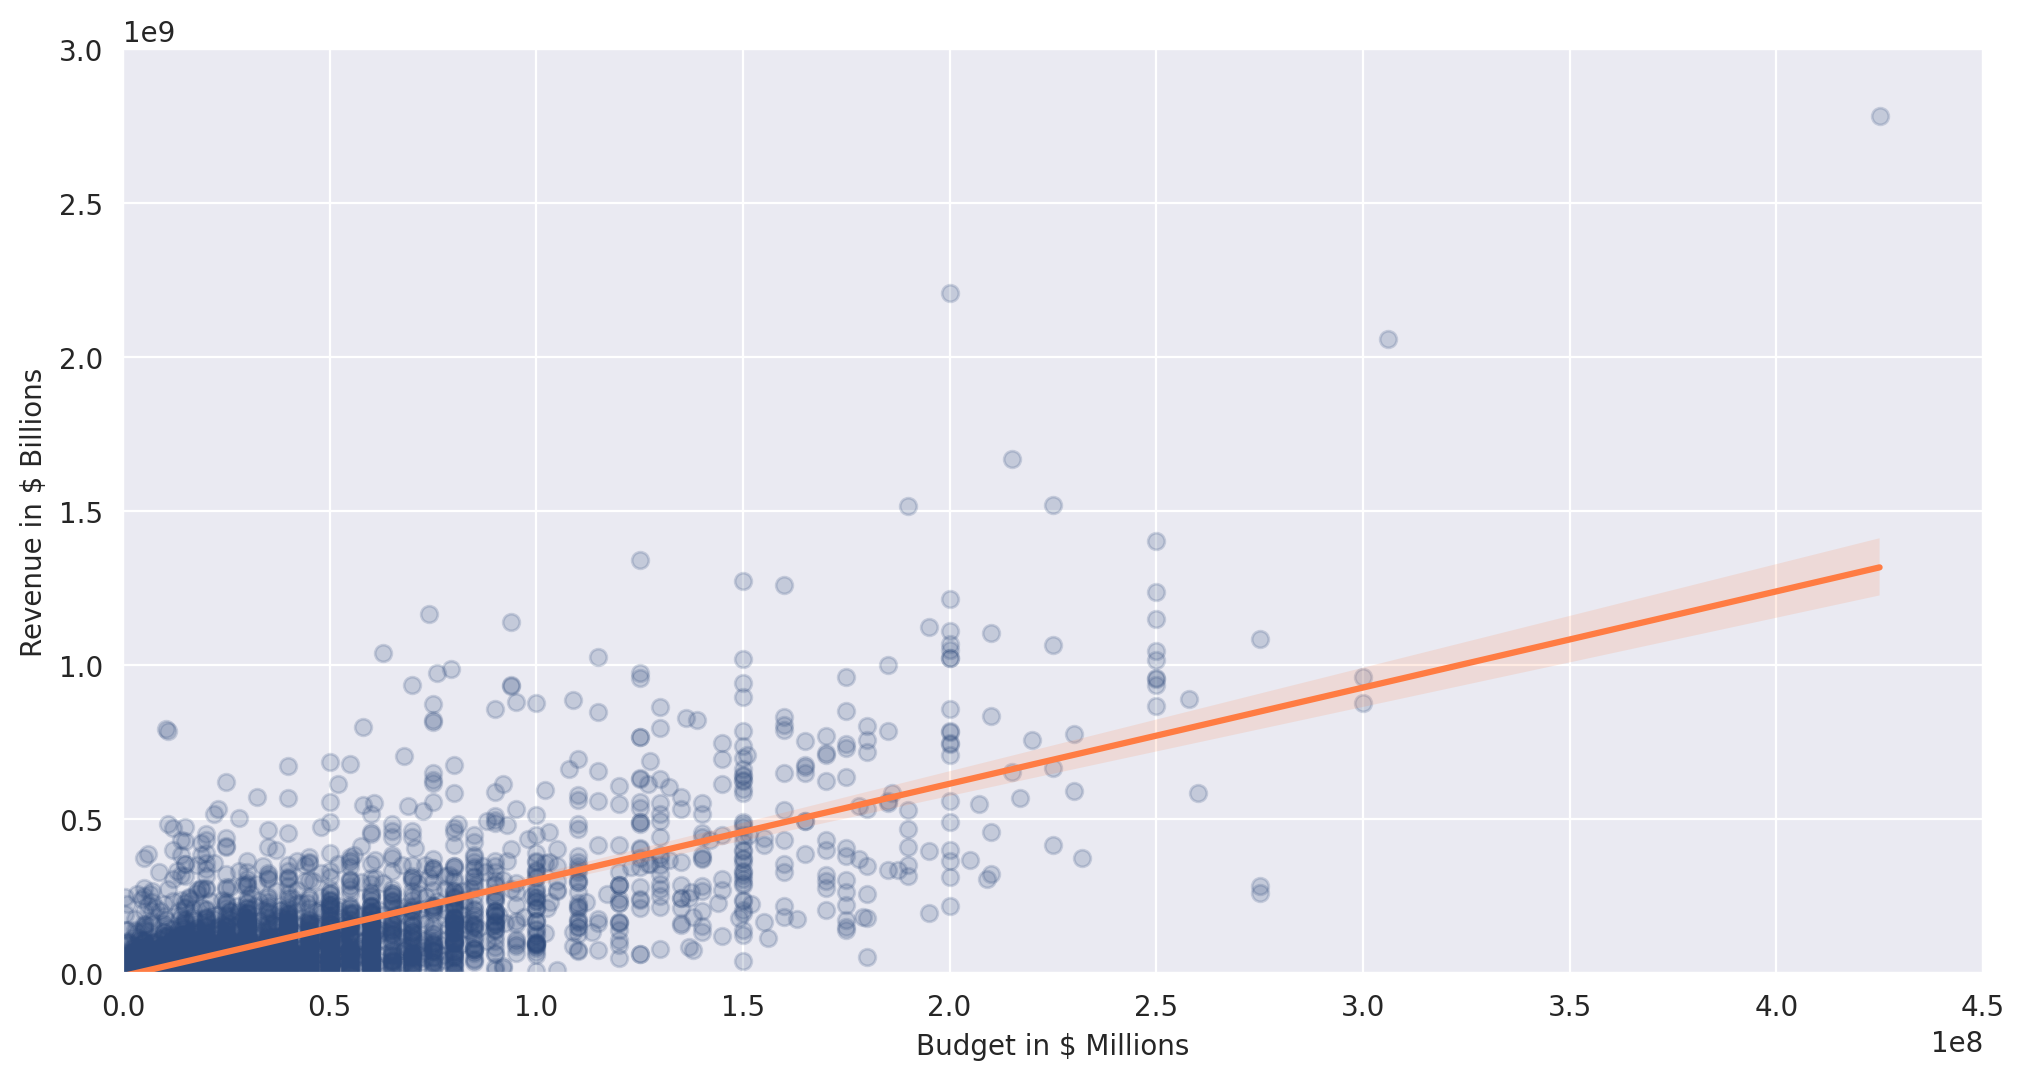

In [63]:
plt.figure(figsize=(12, 6), dpi=200)
with sea.axes_style("darkgrid"):
    ax = sea.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color="#2f4b7c",
        scatter_kws={"alpha": 0.2},
        line_kws={"color": "#ff7c43"},
    )
    ax.set(
        xlim=(0, 4.5 * 1e8),
        ylim=(0, 3 * 1e9),
        ylabel="Revenue in $ Billions",
        xlabel="Budget in $ Millions",
    )


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta \_0 + \theta \_1 BUDGET$$


In [64]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s)
x = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
# Response Variable or Target
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

# Find the best fit line
regression.fit(x, y)
print(f"intercept_ :- {regression.intercept_}")
print(f"corf_ :- {regression.coef_}")

intercept_ :- [-8650768.00661042]
corf_ :- [[3.12259592]]


In [65]:
# R-Squared
regression.score(x, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?


In [66]:
regression_2 = LinearRegression()

X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
Y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

regression_2.fit(X, Y)
print(f"intercept_ :- {regression_2.intercept_}")
print(f"corf_ or slope:- {regression_2.coef_}")

intercept_ :- [22821538.63508039]
corf_ or slope:- [[1.64771314]]


In [67]:
print(f"r-squared :- {regression_2.score(X,Y)}")
print(f"explained about :- {regression_2.score(X,Y)*100}")


r-squared :- 0.02937258620576877
explained about :- 2.937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta \_0 + \theta \_1 BUDGET$$

**Challenge**: How much global revenue does our model estimate for a film with a budget of $350 million?


In [90]:
budgets = [350_000_000, 400_000_000, 450_000_000, 500_000_000, 600_000_000, 700_000_000]


def calculate_budget(budget):
    return round(regression.intercept_[0] + regression.coef_[0, 0] * budget, -6)  # type: ignore


[calculate_budget(i) for i in budgets]

[1084000000.0,
 1240000000.0,
 1397000000.0,
 1553000000.0,
 1865000000.0,
 2177000000.0]